<a href="https://colab.research.google.com/github/efnelson12/EQuaTe_Scripts/blob/main/eNEP_IcPD_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [546]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import data and group by analytical replicate mean

In [547]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [548]:
#import csv
file_path = '/content/drive/MyDrive/Colab Notebooks/EQuaTe data/NEPaper_data/NorthEastEurope_correctagestrat.xlsx'

FAA_NE = pd.read_excel(file_path, sheet_name='FAA')
THAA_NE = pd.read_excel(file_path, sheet_name='THAA')

#extracting data from FAA csv and placing in dataframe
df_FAA_NE = pd.DataFrame(FAA_NE)
df_FAA_NE = df_FAA_NE.add_suffix("_FAA") #suffix data remains allocated to correct fraction

#to prevent error in code all division errors are replaced with zeros

for col in df_FAA_NE.columns[17:28]:
    df_FAA_NE[col] = pd.to_numeric(df_FAA_NE[col], errors="coerce")

df_FAA_NE = df_FAA_NE.replace(np.nan, 0.0, regex=True) #all nan values removed and replace with 0s

#group by mean of each analytical replicate
df_FAA_MN_NE = df_FAA_NE.groupby(['Sample name_FAA'], as_index=False).agg({'location_FAA' : 'first',
                                                                     'Quaternary sites_FAA' : 'first',
                                                                     'Level/ Sample_FAA' : 'first',
                                                                     'relative_FAA' : 'first',
                                                                     'Region_FAA' : 'first',
                                                                     'Age if known_FAA' : 'first',
                                                                     'FAATHAAOrder_FAA' : 'first',
                                                                     'Longitude_FAA' : 'first',
                                                                     'Age rank_FAA' : 'first',
                                                                     "Asx D/L_FAA" : 'mean', "Glx D/L_FAA" : 'mean',
                                                                     "Ser D/L_FAA" : 'mean', #"Arg D/L_FAA" : 'mean',
                                                                     "Ala D/L_FAA" : 'mean',#"Tyr D/L_FAA" : 'mean',
                                                                     "Val D/L_FAA" : 'mean', '[Ser]/[Ala]_FAA' : 'mean'
                                                                           #"Phe D/L_FAA" : 'mean',
                                                                     #"Leu D/L_FAA" : 'mean', "Ile D/L_FAA" : 'mean',
                                                                     })


df_FAA_MN_NE = df_FAA_MN_NE.sort_values(['Age rank_FAA', 'Region_FAA', "Quaternary sites_FAA"], inplace=False, ascending=True) #sort data so FAA and THAA are in the same order

#pulling THAA into dataframe
df_THAA_NE = pd.DataFrame(THAA_NE)
df_THAA_NE = df_THAA_NE.add_suffix("_THAA")

#to prevent error in code all division errors are replaced with zeros
for col in df_THAA_NE.columns[17:28]:
    df_THAA_NE[col] = pd.to_numeric(df_THAA_NE[col], errors="coerce")

df_THAA_NE = df_THAA_NE.replace(np.nan, 0.0, regex=True) #all nan values removed and replace with 0s

#group by mean of each analytical replicate
df_THAA_MN_NE = df_THAA_NE.groupby(['Sample name_THAA'], as_index=False).agg({'location_THAA' : 'first',
                                                                 'Quaternary sites_THAA' : 'first',
                                                                 'Level/ Sample_THAA' : 'first',
                                                                 'Region_THAA' : 'first',
                                                                 'Longitude_THAA' : 'first',
                                                                 'relative_THAA' : 'first',
                                                                 'Age if known_THAA' : 'first',
                                                                 'Age rank_THAA' : 'first',
                                                                 "Asx D/L_THAA" : 'mean', "Glx D/L_THAA" : 'mean',
                                                                 "Ser D/L_THAA" : 'mean', #"Arg D/L_THAA" : 'mean',
                                                                 "Ala D/L_THAA" : 'mean',#"Tyr D/L_THAA" : 'mean',
                                                                 "Val D/L_THAA" : 'mean', '[Ser]/[Ala]_THAA' : 'mean'
                                                                              #"Phe D/L_THAA" : 'mean',
                                                                 #"Leu D/L_THAA" : 'mean', "Ile D/L_THAA" : 'mean',
                                                                 })
df_THAA_MN_NE = df_THAA_MN_NE.sort_values(['Age rank_THAA', "Region_THAA", "Quaternary sites_THAA"], inplace=False, ascending=True) #sort data so FAA and THAA are in the same order

In [549]:
#import UK data (Pennkman et al. (2013) Supplimentary Materials) csv
UK_file_path_FAA = '/content/drive/MyDrive/Colab Notebooks/EQuaTe data/UK/UK FAA.csv'
UK_file_path_THAA = '/content/drive/MyDrive/Colab Notebooks/EQuaTe data/UK/UK THAA.csv'

FAA_UK = pd.read_csv(UK_file_path_FAA, sep=',', encoding='latin-1')
THAA_UK = pd.read_csv(UK_file_path_THAA, sep=',', encoding='latin-1')

In [550]:
#extracting data from FAA csv and placing in dataframe
df_FAA_UK = pd.DataFrame(FAA_UK)
df_FAA_UK = df_FAA_UK.add_suffix("_FAA") #suffix data remains allocated to correct fraction

#to prevent error in code all division errors are replaced with zeros

for col in df_FAA_UK.columns[9:21]:
    df_FAA_UK[col] = pd.to_numeric(df_FAA_UK[col], errors="coerce")

df_FAA_UK = df_FAA_UK.replace(np.nan, 0.0, regex=True) #all nan values removed and replace with 0s


#pulling THAA into dataframe
df_THAA_UK = pd.DataFrame(THAA_UK)
df_THAA_UK = df_THAA_UK.add_suffix("_THAA")

for col in df_THAA_UK.columns[9:21]:
    df_THAA_UK[col] = pd.to_numeric(df_THAA_UK[col], errors="coerce")

df_THAA_UK = df_THAA_UK.replace(np.nan, 0.0, regex=True) #all nan values removed and replace with 0s

In [551]:
df_THAA_UK["Suspected age_THAA"].unique()

array(['Modern', 'Holocene', 'MIS 2', 'MIS 4/5a', 'MIS 5e', 'MIS 7',
       'MIS 9', 'MIS 11', 'MIS 9 and 11', 'Cromerian Arvicola',
       'Cromerian Mimomys', 'Bavelian', 'Weybourne Crag', 'Tiglian',
       'Prae-Tiglian', 'Pliocene'], dtype=object)

# THAA vs. FAA plots for Figure 4 and SI

In [552]:
#Concatenating FAA and THAA eastern North European Plain dfs to create FAA vs. THAA plot
df_alldata =  pd.concat([df_FAA_MN_NE, df_THAA_MN_NE[[("Asx D/L_THAA"),
                                           ("Glx D/L_THAA"),
                                           ("Ser D/L_THAA"),
                                           ("Ala D/L_THAA"),
                                           ("Val D/L_THAA"),
                                           ('[Ser]/[Ala]_THAA')
                                          ]]], axis=1)

df_alldata = df_alldata.groupby(["Sample name_FAA"], as_index=False).agg({'Quaternary sites_FAA':"first",
                                                                          'Level/ Sample_FAA' : 'first',
                                                                           'Region_FAA' : 'first',
                                                                           'FAATHAAOrder_FAA' : 'first',
                                                                           'Longitude_FAA' : 'first',
                                                                           'relative_FAA' : 'first',
                                                                           'Age if known_FAA' : 'first',
                                                                           'Age rank_FAA' : 'first',
                                                                           "Asx D/L_FAA" : 'mean',
                                                                           "Glx D/L_FAA" : 'mean',
                                                                           "Ser D/L_FAA" : 'mean',
                                                                           "Ala D/L_FAA" : 'mean',
                                                                           "Val D/L_FAA" : 'mean',
                                                                           '[Ser]/[Ala]_FAA' : 'mean',
                                                                           "Asx D/L_THAA" : 'mean',
                                                                           "Glx D/L_THAA" : 'mean',
                                                                           "Ser D/L_THAA" : 'mean',
                                                                           "Ala D/L_THAA" : 'mean',
                                                                           "Val D/L_THAA" : 'mean',
                                                                           '[Ser]/[Ala]_THAA' : 'mean'
})


#df_mean_all = df_mean_all.sort_values(["Age rank_FAA", "Quaternary sites_FAA"], inplace=False, ascending=True)
df_alldata["Horizon"] = df_alldata['Quaternary sites_FAA'].astype(str) + " " + df_alldata["Level/ Sample_FAA"].astype(str) #combine site name and level for plot formatting and legend caption
df_alldata["AgeRegion"] = df_alldata['Region_FAA'] + " " + df_alldata["Age if known_FAA"].astype(str) #Combine region and chronostratigraphic for correct plot formatting
df_alldata = df_alldata.sort_values(["FAATHAAOrder_FAA", "Horizon", 'Region_FAA'], inplace=False, ascending=True) # sort plot in correct order for plot

In [553]:
#define dfs for each regional aminostratigraphy

df_TB = df_alldata.loc[df_alldata['Region_FAA'].isin(['Thuringian Basin'])]
df_TB = df_TB.sort_values(["Age rank_FAA"], inplace=False, ascending=True)

df_NE = df_alldata.loc[df_alldata['Region_FAA'].isin(['North East German Plain'])]
df_NE = df_NE.sort_values(["FAATHAAOrder_FAA", "Horizon", 'Region_FAA'], inplace=False, ascending=True)

df_CP = df_alldata.loc[df_alldata['Region_FAA'].isin(['Central Poland'])]
df_CP = df_CP.sort_values(["Age rank_FAA"], inplace=False, ascending=True)

df_EP = df_alldata.loc[df_alldata['Region_FAA'].isin(['East Poland', 'Lithuania & NE Poland'])]
df_EP = df_EP.sort_values(["Age rank_FAA"], inplace=False, ascending=True)

df_NG = df_alldata.loc[df_alldata['Region_FAA'].isin(['Thuringian Basin', 'North East German Plain'])]
df_NG = df_NG.sort_values(["Age rank_FAA"], inplace=False, ascending=True)

df_Pol = df_alldata.loc[df_alldata['Region_FAA'].isin(['Central Poland', 'East Poland', 'Lithuania & NE Poland'])]
df_Pol = df_Pol.sort_values(["Age rank_FAA"], inplace=False, ascending=True)

In [554]:
#The following code is to create plots which defines colour by borehole and not MS cycle
## all colours at https://xkcd.com/color/rgb/
### in built marker styles for matplotlib: 'o', 'p', 'v', '*', '^', 'h', '<',  'd', '8', '>', 'P', 's', 'X', (6,1,0), 'H', 'D'

"""
palettes for FAA vs. THAA plots
Where all regional aminostratigraphies are to be plotted on the same plot palette_ageregion should be used
where they are plotted on separate subplots palette age should be used
"""

#east poland lightest shade, then CL, then TB, NE Germany darkest
palette_age =  {"Holocene" : 'red', "Vistulian" : "gold", "Eemian" : 'darkgoldenrod', "Saalian Complex": "teal", "MIS 7" : "green", "Middle Pleistocene": 'navy', "Holsteinian": 'purple', "Elsterian" : 'grey', "Arternian" : 'brown', "Bavelian" : "black", "Miocene" : "chocolate"}
palette_ageregion =  {'East Poland Holocene': 'tomato', 'Central Poland Holocene' : 'red', 'Thuringian Basin Holocene' : 'firebrick', 'North East German Plain Holocene' : 'maroon',
                      'East Poland Vistulian' : "darkorange",
                      'East Poland Eemian' : 'gold', 'Central Poland Eemian' : '#d0c101', 'Thuringian Basin Eemian' : '#fcb001', 'Thuringian Basin Ehringsdorf Eemian': '#fcb001', 'North East German Plain Eemian' : '#b79400', 'North East German Plain Stolpe Eemian': '#b79400',
                      'Lithuania & NE Poland MIS 7' : "#a4bf20", 'Thuringian Basin MIS 7' : "green", 'Central Poland Saalian Complex' : "teal",
                      'Thuringian Basin Saalian Complex': "#06470c", 'North East German Plain Saalian Complex': "teal",
                      'Thuringian Basin Middle Pleistocene' : 'navy', 'Thuringian Basin Hongeda Mid. Pleistocene' : 'navy', 'Thuringian Basin Borntal Mid. Pleistocene' : 'navy', 'Thuringian Basin early Mid. Pleistocene' : 'navy',
                      'East Poland Holsteinian': 'thistle', 'Central Poland Holsteinian': 'mediumorchid', 'Thuringian Basin Holsteinian': 'purple', 'North East German Plain Holsteinian': 'rebeccapurple',
                      'Thuringian Basin late Elsterian' : 'grey', 'Thuringian Basin Elsterian' : 'grey', "Thuringian Basin Jena early Mid. Pleistocene" : 'grey', 'Thuringian Basin Arternian' : 'brown', 'Lithuania & NE Poland Bavelian' : "black", 'East Poland Miocene' : "chocolate", 'Central Poland Miocene' : "chocolate"}


#markers for combined plot
markers = ['P', 'o', 'p', 'v','*', 'D', #Holocene
           'o', 'P', 's', 'p', 'v','^', #EP Eemian
           'h',  '*', '<',  'd', '8', '>', 's', #CL Eemian
           'P', 'o', 'p', 'v','^', 'h',  '*','<',  'd', '8', '>', 's', 'H', 'D', 'X', (7,1,0),
           r'$\clubsuit$', r'$\spadesuit$', (10,1,0),(3,0, 50), (3,0, 350), r'$\alpha$', r'$\imath$', ".", #Eemian TB
           'o', 'p', 'v','^', 'h',  '*','<',  #NE Eemian
           'd', #Valakampiai
           '8', '>', #Saalian TB
           's', # Saalian NEG
           'H', 'D', #TB Middle Pleistocene
           'X', (7,1,0), 'H', 'D', r'$\spadesuit$', 's', 'o', 'p', 'v','^', 'h',  '*','<', 'd', ".", '>', (10,1,0),(3,0, 50), r'$\clubsuit$', #E Polish Holsteinian
           'X', (7,1,0), #TB Holsteinian
           'P', 'o', 'p', 'v','^', 'd', '8', '*', '.', 's', 'h', 'D', #NEG Holsteinian
           'h',  '*', #Elsterian
           '<',  'd', '8', #Voigtstedt
           '>', 's', #Bavelian
           'P','>' #Miocene
           ]




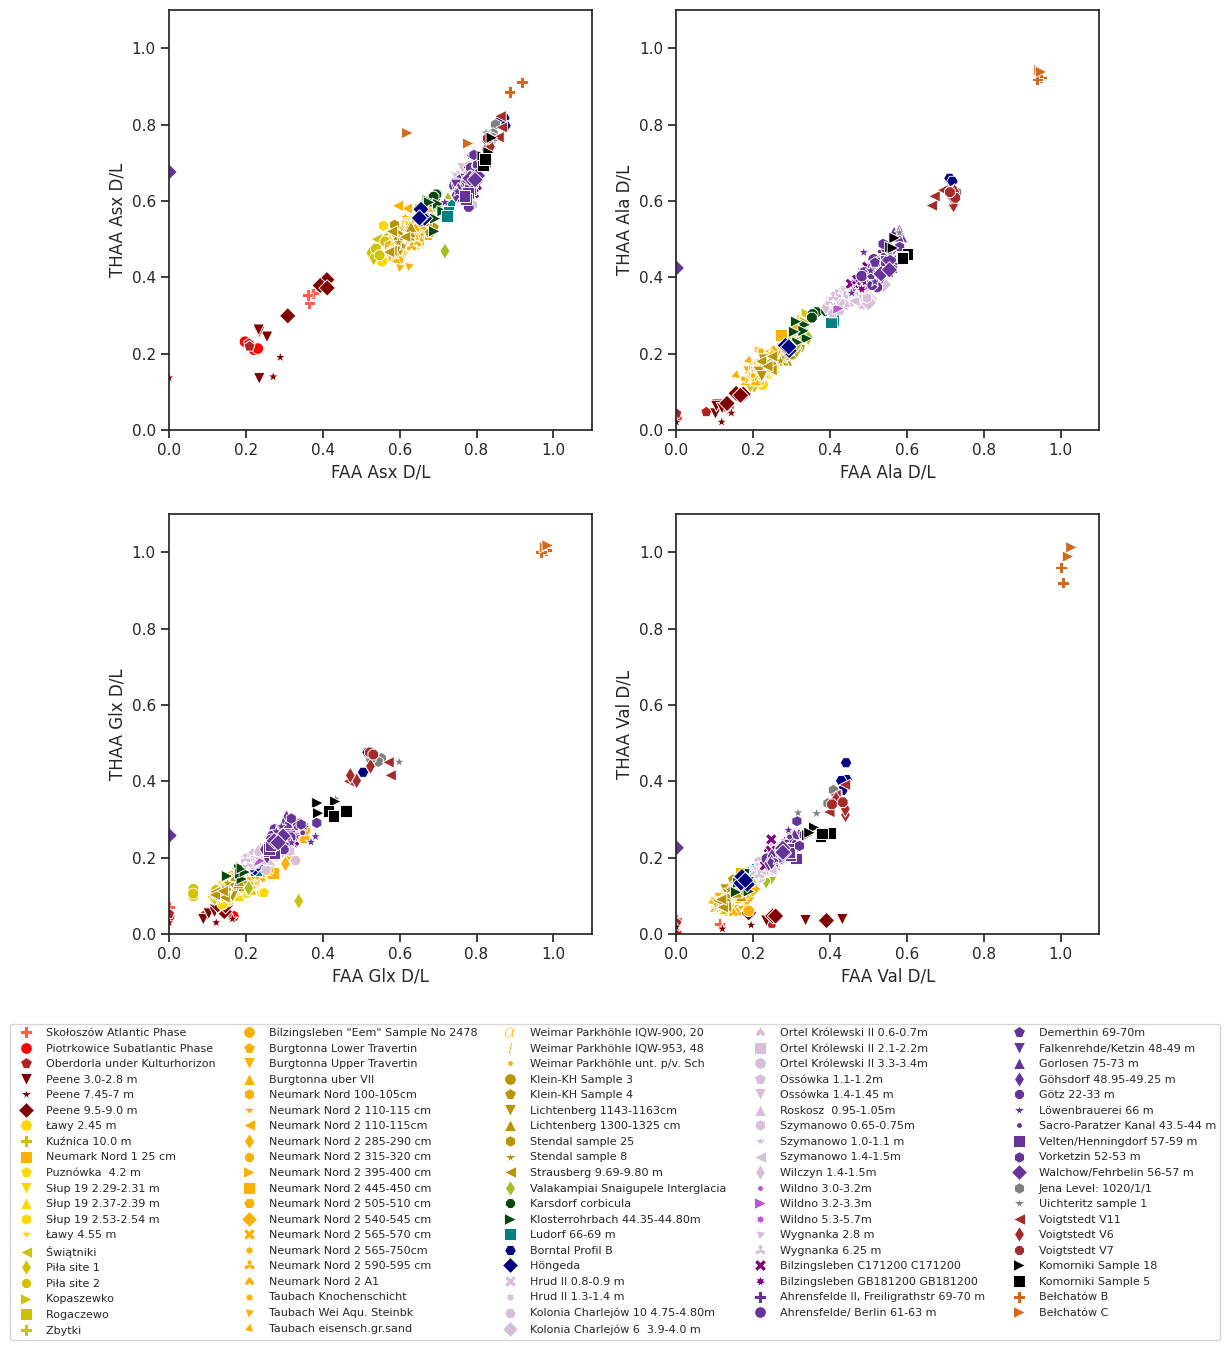

In [555]:
# Four amino acids are plotted: Asx, Glx, Ala and Val
## Regional aminostratigraphies are plotted with different colour hues: east poland lightest shade, then CL, then TB, NE Germany darkest

df = df_alldata


sns.set(style="ticks")
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.scatterplot(ax=ax[0,0], x=df["Asx D/L_FAA"], y=df["Asx D/L_THAA"],
                         data=df, hue=df["AgeRegion"],
                         style=df["Horizon"],
                         markers=markers, s=70, palette=palette_ageregion, legend=False)
ax[0,0].set_xlabel("FAA Asx D/L")
ax[0,0].set_ylabel("THAA Asx D/L")
ax[0,0].set_ylim(0,1.1)
ax[0,0].set_xlim(0,1.1)

sns.scatterplot(ax=ax[0,1], x=df["Ala D/L_FAA"], y=df["Ala D/L_THAA"],
                         data=df, hue=df["AgeRegion"],
                         style=df["Horizon"],
                         markers=markers, s=70, palette=palette_ageregion, legend=False)
ax[0,1].set_xlabel("FAA Ala D/L")
ax[0,1].set_ylabel("THAA Ala D/L")
ax[0,1].set_ylim(0,1.1)
ax[0,1].set_xlim(0,1.1)

sns.scatterplot(ax=ax[1,0], x=df["Glx D/L_FAA"], y=df["Glx D/L_THAA"],
                         data=df, hue=df["AgeRegion"],
                         style=df["Horizon"],
                         markers=markers, s=70, palette=palette_ageregion, legend=False)
ax[1,0].set_xlabel("FAA Glx D/L")
ax[1,0].set_ylabel("THAA Glx D/L")
ax[1,0].set_ylim(0,1.1)
ax[1,0].set_xlim(0,1.1)

depth_to_site_dict = df.set_index("Horizon")["AgeRegion"].to_dict()
df['Subscale'] = df['Horizon'].map(depth_to_site_dict)
df['Subscale'] = pd.Categorical(df['Subscale'])  # creates a fixed order
sns.scatterplot(ax=ax[1,1], x=df["Val D/L_FAA"], y=df["Val D/L_THAA"],
                         data=df, hue=df["AgeRegion"],
                         style=df["Horizon"],
                         markers=markers, s=70, palette=palette_ageregion)
ax[1,1].set_xlabel("FAA Val D/L")
ax[1,1].set_ylabel("THAA Val D/L")
ax[1,1].set_ylim(0,1.1)
ax[1,1].set_xlim(0,1.1)


# create a dictionary mapping the subscales to their color
handles, labels = ax[1,1].get_legend_handles_labels()
index_depth_title = labels.index("Horizon")
color_dict = {label: handle.get_markerfacecolor()
for handle, label in zip(handles[1:index_depth_title], labels[1:index_depth_title])}
# loop through the items, assign color via the subscale of the item idem
for handle, label in zip(handles[index_depth_title + 1:], labels[index_depth_title + 1:]):
  handle.set_markerfacecolor(color_dict[depth_to_site_dict[label]])
#create a legend only using the items
#legend1 = plt.legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], title='Site & Horizon',
 #                   loc="upper center", bbox_to_anchor=(0.5, -0.05), fontsize=10, ncol=5)

legend = ax[1, 1].legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], loc='upper right', ncol=5,
                         fontsize=8)
legend.set_bbox_to_anchor((1.3, -0.2))  # Adjust the anchor point for the legend
plt.savefig("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/Figures/alldata.svg")
plt.show()

/tmp/ipython-input-82680900.py:15: UserWarning: 
The markers list has fewer values (6) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax=ax, x=df[f"{AA} D/L_FAA"], y=df[f"{AA} D/L_THAA"],


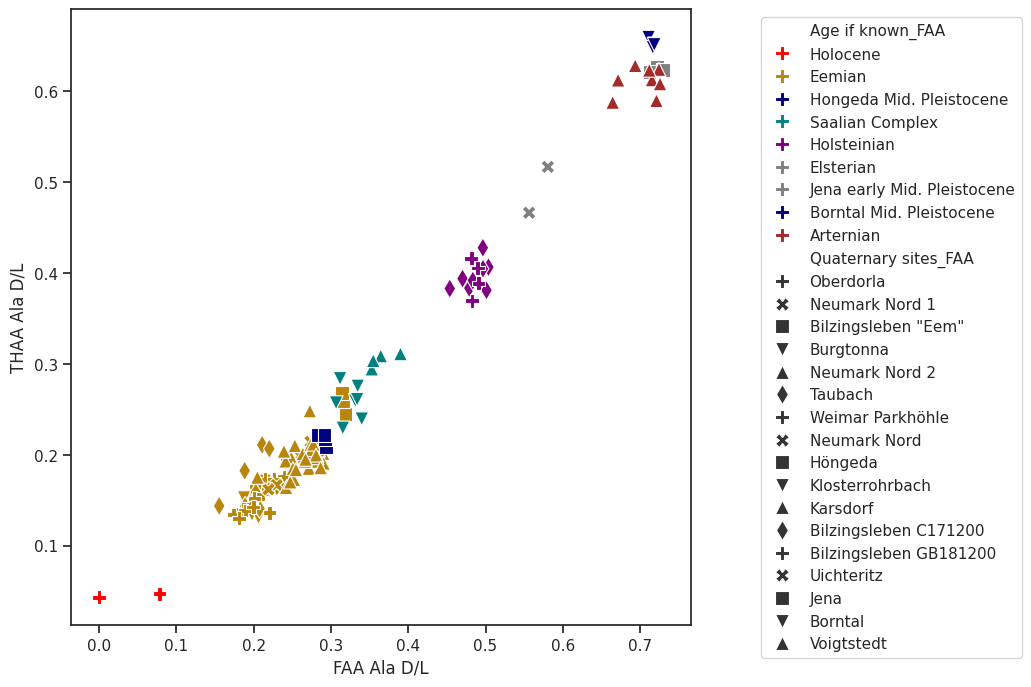

In [556]:
cols_NG = {'Holocene': 'red', 'Eemian': 'darkgoldenrod', 'MIS 7' : 'green', 'Saalian Complex': 'teal', 'Holsteinian': 'purple', 'Elsterian': 'grey', 'Jena early Mid. Pleistocene': 'grey', 'Arternian': 'brown', 'Hongeda Mid. Pleistocene' : 'navy', 'Borntal Mid. Pleistocene' : 'navy',  'Bavelian' : 'black', 'Miocene' : 'chocolate'}

markers = ['P','*', 'X', 's', 'v','D', 'd', '^', 'h', '<', 'H', 's', '>', '.', #CL Eemian
            '*', (7,1,0), 'o', 'X']

markers2 = ["P", "X", "s", "v", "^", "d"]


AA = "Ala"

df = df_TB

sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(ax=ax, x=df[f"{AA} D/L_FAA"], y=df[f"{AA} D/L_THAA"],
                         data=df, hue=df["Age if known_FAA"],
                         style=df["Quaternary sites_FAA"],
                         markers=markers2, s=100, palette=cols_NG, edgecolor='white', legend=True, alpha=1)
ax.set_xlabel(f"FAA {AA} D/L")
ax.set_ylabel(f"THAA {AA} D/L")
legend = ax.legend()
legend.set_bbox_to_anchor((1.1, 1))  # Adjust the anchor point for the legend

depth_to_site_dict = df.set_index("Quaternary sites_FAA")["Age if known_FAA"].to_dict()
df['Subscale'] = df["Quaternary sites_FAA"].map(depth_to_site_dict)
df['Subscale'] = pd.Categorical(df['Subscale'])  # creates a fixed order




#sns.scatterplot(ax=ax, x=df_Bilz1["Ala D/L_FAA"], y=df_Bilz1["Ala D/L_THAA"],
 #                        data=df_Bilz1, hue=df_Bilz1["Horizon"],
  #                       style=df_Bilz1["Horizon"],
   #                      markers=markers2, s=120, palette=bilz_palette, edgecolor='black', legend=True)
ax.set_xlabel(f"FAA {AA} D/L")
ax.set_ylabel(f"THAA {AA} D/L")





#ax.errorbar(df_NN["FAA Ala DL mean"],
       #     df_NN['THAA Ala DL mean'],
      #      xerr=  df_NN['FAA Ala DL std'],
     #       linestyle='None',
    #        color='black',
   #         elinewidth=3,
  #          capsize=3,
 #           fmt=' ')  # Remove any line connecting points



#ax.errorbar(df_NN["FAA Ala DL mean"],
      #      df_NN['THAA Ala DL mean'],
          #  yerr=  df_NN['THAA Ala DL std'],
     #       linestyle='None',
   #         color='black',
  #          elinewidth=3,
    #        capsize=3,
 #           fmt=' ')  # Remove any line connecting points

#sns.scatterplot(x=df_NN["FAA Ala DL mean"], y=df_NN["THAA Ala DL mean"],
         #       data=df_NN,
        #        hue=df_NN["Quaternary sites_FAA"],
       #         style=df_NN["Quaternary sites_FAA"],
      #          markers=markers,
     #           ax=ax,
   #             zorder=12,
    #            palette=NN_palette,
  #              s=120,
 #        #       edgecolor="black",
#                legend=False)

#legend = ax.legend(loc="upper left",
 #                  #title="Chronostratigraphic stages"
  #                 )


#legend.set_bbox_to_anchor((1.1, 1))  # Adjust the anchor point for the legend

# create a dictionary mapping the subscales to their color
handles, labels = ax.get_legend_handles_labels()
index_depth_title = labels.index("Quaternary sites_FAA")
color_dict = {label: handle.get_markerfacecolor()
for handle, label in zip(handles[1:index_depth_title], labels[1:index_depth_title])}
# loop throug\

# Violinplots: IcPD data vs. chronostratigraphic stage for Figure 5 and SI

/tmp/ipython-input-505484168.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels_uk, rotation=90)
/tmp/ipython-input-505484168.py:49: UserWarning: Mismatched number of handles and labels: len(handles) = 16 len(labels) = 13
  ax.legend(handles=handles, labels = labels, title="British\nChronostratigraphic\nStages", fontsize=8, loc="upper left", title_fontsize=9)


(-0.5, 11.5)

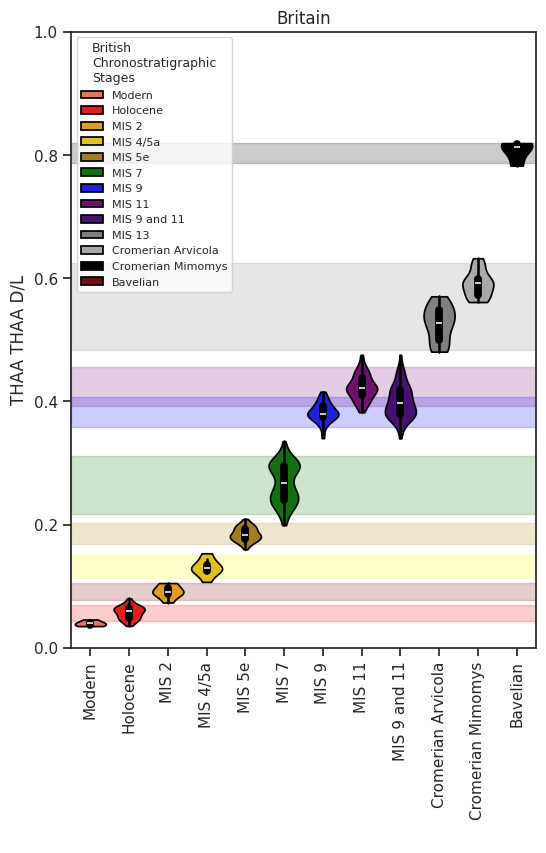

In [557]:
#Find 5th and 95th percentile boundaries for each British chronostratigraphic stage
AA = "Ala" #change amino acid here
Fraction = "THAA" #change fraction here
df = df_THAA_UK

def UK_percentile(df, Stage, AA, Fraction):
    df_stage = df.loc[df['Suspected age_THAA'] == Stage]
    min = df_stage[f"{AA} D/L mean_{Fraction}"].quantile(0.05)
    max = df_stage[f"{AA} D/L mean_{Fraction}"].quantile(0.95)
    return min, max

Holo_min, Holo_max = UK_percentile(df_THAA_UK, "Holocene", AA, Fraction) #Holocene
MIS2_min, MIS2_max = UK_percentile(df_THAA_UK, "MIS 2", AA, Fraction) #MIS 1
MIS4_5_min, MIS4_5_max = UK_percentile(df_THAA_UK, "MIS 4/5a", AA, Fraction) #MIS 4/5a
MIS5e_min, MIS5e_max = UK_percentile(df_THAA_UK, "MIS 5e", AA, Fraction) #MIS 5e
MIS7_min, MIS7_max = UK_percentile(df_THAA_UK, "MIS 7", AA, Fraction) #MIS 7
MIS9_min, MIS9_max = UK_percentile(df_THAA_UK, "MIS 9", AA, Fraction) #MIS 9
MIS11_min, MIS11_max = UK_percentile(df_THAA_UK, "MIS 11", AA, Fraction) #MIS 11
Arv_min, Arv_max = UK_percentile(df_THAA_UK, "Cromerian Arvicola", AA, Fraction) #Cromerian Arvicola
Mim_min, Mim_max = UK_percentile(df_THAA_UK, "Cromerian Mimomys", AA, Fraction) #Cromerian Mimomys
Bav_min, Bav_max = UK_percentile(df_THAA_UK, "Bavelian", AA, Fraction) #Bavelian
Tig_min, Tig_max = UK_percentile(df_THAA_UK, "Tiglian", AA, Fraction) #Tiglian
Plio_min, Plio_max = UK_percentile(df_THAA_UK, "Tiglian", AA, Fraction) #Pliocene

#define palette for each British chronostratigraphic stage
cols_uk = {"Modern" : 'tomato', "Holocene" : "red", "MIS 2" : 'orange', "MIS 3" : 'orange', "MIS 4/5a" : 'gold', "MIS 5e" : 'darkgoldenrod',  "MIS 7" : "green", "MIS 9": "blue", "MIS 11": 'purple', "MIS 9 and 11": 'indigo',"MIS 13" : 'grey', "Cromerian" : 'grey', "Cromerian Arvicola" : 'grey', "Cromerian Mimomys" : 'darkgrey', "Arternian" : 'brown', "Bavelian" : "black", "Weybourne Crag" : "maroon", "Tiglian" : "brown", "Prae-Tiglian" : "navy", "Pliocene" : "chocolate"}

#define tick labels for each British chronstratigraphic state
tick_labels_uk = ["Modern", "Holocene", "MIS 2", "MIS 4/5a", "MIS 5e",  "MIS 7", "MIS 9", "MIS 11", "MIS 9 and 11", "Cromerian Arvicola", "Cromerian Mimomys", "Bavelian", "Weybourne Crag", "Tiglian", "Prae-Tiglian", "Pliocene"]

#British THAA Ala violin plot - shows spread of data for each British chronostratigraphic stage opercula from the British record have been correlated with
fig, ax = plt.subplots(figsize=(6, 8))

ax.axhspan(Holo_min, Holo_max, alpha=0.2, color="red") #Holocene
ax.axhspan(MIS2_min, MIS2_max, alpha=0.2, color="maroon") #MIS 2
ax.axhspan(MIS4_5_min, MIS4_5_max, alpha=0.2, color="yellow") #MIS 4/5a
ax.axhspan(MIS5e_min, MIS5e_max, alpha=0.2, color="darkgoldenrod") #MIS 5e
ax.axhspan(MIS7_min, MIS7_max, alpha=0.2, color="green") #MIS 7
ax.axhspan(MIS9_min, MIS9_max, alpha=0.2, color="blue") #MIS 9
ax.axhspan(MIS11_min, MIS11_max, alpha=0.2, color="purple") #MIS 11
ax.axhspan(Arv_min, Mim_max, alpha=0.2, color="grey") #Cromerian
ax.axhspan(Bav_min, Bav_max, alpha=0.2, color="black") #Bavelian
ax = sns.violinplot(data=df, x=f"Suspected age_{Fraction}", y=f"{AA} D/L mean_{Fraction}", hue=f"Suspected age_{Fraction}", palette=cols_uk, ax=ax, legend=True, cut=0)
ax.set_title("Britain")
ax.set_xticklabels(tick_labels_uk, rotation=90)
ax.set_ylabel(f"THAA {Fraction} D/L")
handles, labels = ax.get_legend_handles_labels()
labels = ["Modern", "Holocene", "MIS 2", "MIS 4/5a", "MIS 5e", "MIS 7", "MIS 9", "MIS 11", "MIS 9 and 11", "MIS 13", "Cromerian Arvicola", "Cromerian Mimomys", "Bavelian"]
ax.legend(handles=handles, labels = labels, title="British\nChronostratigraphic\nStages", fontsize=8, loc="upper left", title_fontsize=9)
ax.set_xlabel(" ")
plt.ylim(0, 1)
plt.xlim(-0.5, 11.5)


/tmp/ipython-input-1465501692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
/tmp/ipython-input-1465501692.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
/tmp/ipython-input-1465501692.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["Holocene", "Eemian", "Mid. Pleistocene", "Saalian Complex", "Holsteinian", "late Elsterian", ""], rotation=90, ha='right')
/tmp/ipython-input-1465501692.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(ax[3].get_xticklabe

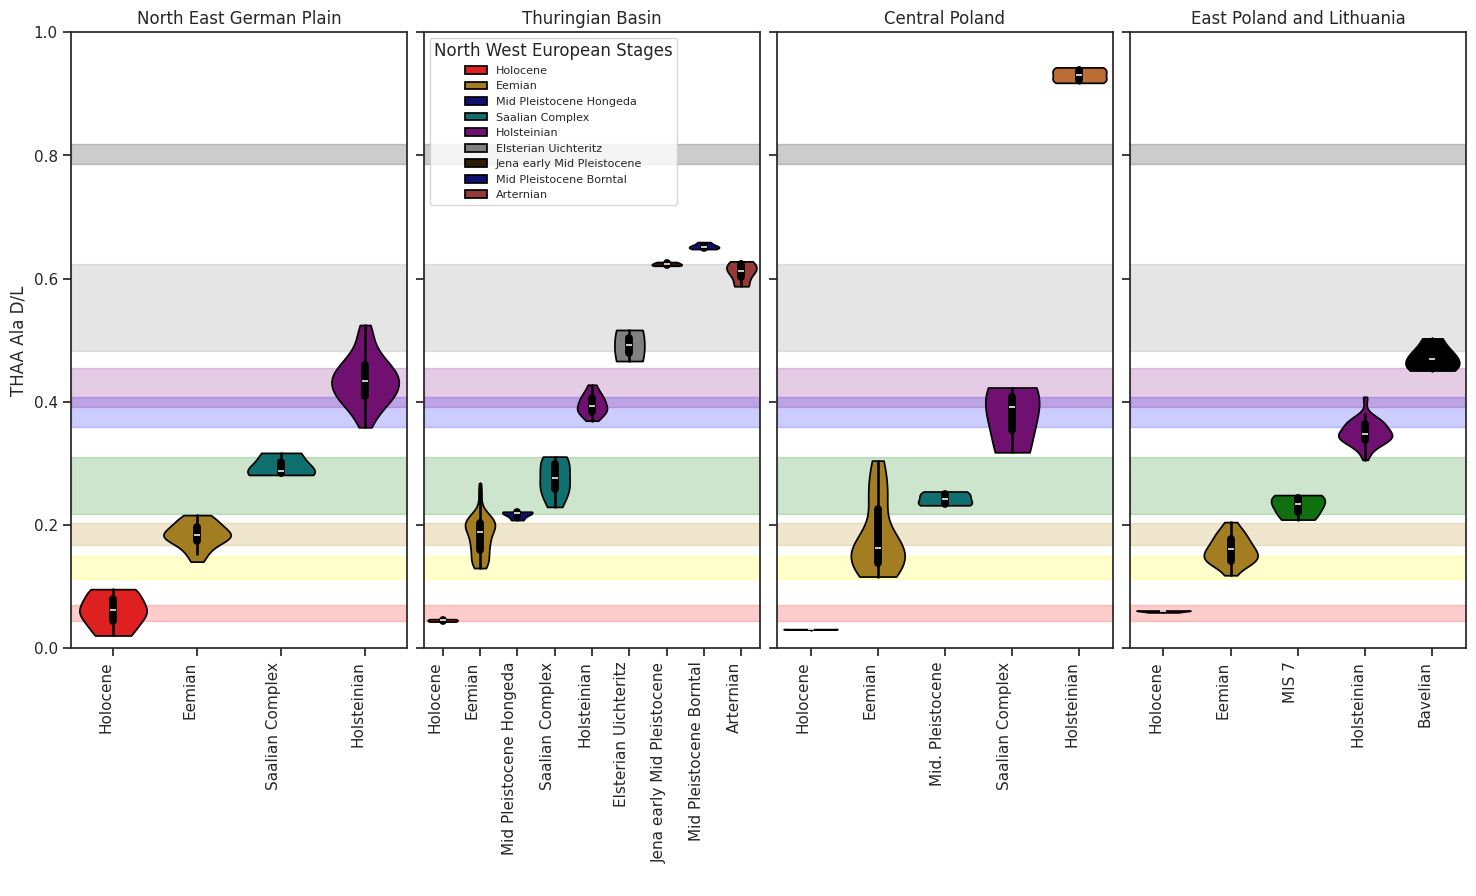

In [558]:
#palette for NW European chronostratigraphic stages
cols = {"Holocene" : 'red', "Vistulian" : "orange", "Eemian" : 'darkgoldenrod', 'Eemian outlier' : "goldenrod", "Saalian Complex": "teal", "MIS 7" : "green",
        "Ehringsdorf MIS 7" : "green", "Mid Pleistocene Borntal": 'navy', "Mid Pleistocene Hongeda": 'navy', "Holsteinian": 'purple', "Elsterian Uichteritz" : 'grey', "late Elsterian" : 'grey',
        "Elsterian Jena" : 'grey','Jena early Mid Pleistocene' : '#341c02', 'early Mid Pleistocene' : '#341c02',"Arternian" : 'brown', "Bavelian" : "black", "Miocene" : "chocolate"}

df_ENEP = df_THAA_MN_NE

#defining individual aminostratigraphies
EPOL = df_ENEP.loc[df_ENEP[f'Region_{Fraction}'].isin(['East Poland', "Lithuania & NE Poland"])]
EPOL = EPOL.sort_values([f"Age rank_{Fraction}"], inplace=False, ascending=True)
CLPol = df_ENEP.loc[df_ENEP[f'Region_{Fraction}'].isin(['Central Poland'])]
CLPol = CLPol.sort_values([f"Age rank_{Fraction}"], inplace=False, ascending=True)
TB = df_ENEP.loc[df_ENEP[f'Region_{Fraction}'].isin(['Thuringian Basin'])]
TB = TB.sort_values([f"Age rank_{Fraction}"], inplace=False, ascending=True)
NEG = df_ENEP.loc[df_ENEP[f'Region_{Fraction}'] == "North East German Plain"]
NEG = NEG.sort_values([f"Age rank_{Fraction}"], inplace=False, ascending=True)


fig, ax = plt.subplots(ncols= 4, figsize=(18, 8), sharey=True)

tick_labels =["East Poland", "Central Polish \nLowlands", "North East \nGerman Plain", "Thuringian Basin"]


ax[0].axhspan(Holo_min, Holo_max, alpha=0.2, color="red") #Holocene
ax[0].axhspan(MIS4_5_min, MIS4_5_max, alpha=0.2, color="yellow") #MIS 4/5a
ax[0].axhspan(MIS5e_min, MIS5e_max, alpha=0.2, color="darkgoldenrod") #MIS 5e
ax[0].axhspan(MIS7_min, MIS7_max, alpha=0.2, color="green") #MIS 7
ax[0].axhspan(MIS9_min, MIS9_max, alpha=0.2, color="blue") #MIS 9
ax[0].axhspan(MIS11_min, MIS11_max, alpha=0.2, color="purple") #MIS 11
ax[0].axhspan(Arv_min, Mim_max, alpha=0.2, color="grey") #Cromerian
ax[0].axhspan(Bav_min, Bav_max, alpha=0.2, color="black") #Bavelian
ax[0] = sns.violinplot(data=NEG, x=f"Age if known_{Fraction}", y=f"{AA} D/L_{Fraction}", hue=f"Age if known_{Fraction}", palette=cols, ax=ax[0], cut=0, legend=False)
ax[0].set_title("North East German Plain")
ax[0].set_ylabel(f"{Fraction} {AA} D/L")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_xlabel(" ")

ax[1].axhspan(Holo_min, Holo_max, alpha=0.2, color="red") #Holocene
ax[1].axhspan(MIS4_5_min, MIS4_5_max, alpha=0.2, color="yellow") #MIS 4/5a
ax[1].axhspan(MIS5e_min, MIS5e_max, alpha=0.2, color="darkgoldenrod") #MIS 5e
ax[1].axhspan(MIS7_min, MIS7_max, alpha=0.2, color="green") #MIS 7
ax[1].axhspan(MIS9_min, MIS9_max, alpha=0.2, color="blue") #MIS 9
ax[1].axhspan(MIS11_min, MIS11_max, alpha=0.2, color="purple") #MIS 11
ax[1].axhspan(Arv_min, Mim_max, alpha=0.2, color="grey") #Cromerian
ax[1].axhspan(Bav_min, Bav_max, alpha=0.2, color="black") #Bavelian
ax[1] = sns.violinplot(data=TB, x=f"Age if known_{Fraction}", y=f"{AA} D/L_{Fraction}", hue=f"Age if known_{Fraction}", palette=cols, ax=ax[1], cut=0, legend=True)
ax[1].set_title("Thuringian Basin")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].legend(title="North West European Stages", fontsize=8, loc="upper left")
ax[1].set_xlabel(" ")

ax[2].axhspan(Holo_min, Holo_max, alpha=0.2, color="red") #Holocene
ax[2].axhspan(MIS4_5_min, MIS4_5_max, alpha=0.2, color="yellow") #MIS 4/5a
ax[2].axhspan(MIS5e_min, MIS5e_max, alpha=0.2, color="darkgoldenrod") #MIS 5e
ax[2].axhspan(MIS7_min, MIS7_max, alpha=0.2, color="green") #MIS 7
ax[2].axhspan(MIS9_min, MIS9_max, alpha=0.2, color="blue") #MIS 9
ax[2].axhspan(MIS11_min, MIS11_max, alpha=0.2, color="purple") #MIS 11
ax[2].axhspan(Arv_min, Mim_max, alpha=0.2, color="grey") #Cromerian
ax[2].axhspan(Bav_min, Bav_max, alpha=0.2, color="black") #Bavelian
ax[2] = sns.violinplot(data=CLPol, x=f"Age if known_{Fraction}", y=f"{AA} D/L_{Fraction}", hue=f"Age if known_{Fraction}", palette=cols, ax=ax[2], cut=0, legend=False)
ax[2].set_title("Central Poland")
ax[2].set_xticklabels(["Holocene", "Eemian", "Mid. Pleistocene", "Saalian Complex", "Holsteinian", "late Elsterian", ""], rotation=90, ha='right')
ax[2].set_xlabel(" ")
#ax[2].legend(title="North West European Stages", fontsize=8, loc="upper left")

ax[3].axhspan(Holo_min, Holo_max, alpha=0.2, color="red") #Holocene
ax[3].axhspan(MIS4_5_min, MIS4_5_max, alpha=0.2, color="yellow") #MIS 4/5a
ax[3].axhspan(MIS5e_min, MIS5e_max, alpha=0.2, color="darkgoldenrod") #MIS 5e
ax[3].axhspan(MIS7_min, MIS7_max, alpha=0.2, color="green") #MIS 7
ax[3].axhspan(MIS9_min, MIS9_max, alpha=0.2, color="blue") #MIS 9
ax[3].axhspan(MIS11_min, MIS11_max, alpha=0.2, color="purple") #MIS 11
ax[3].axhspan(Arv_min, Mim_max, alpha=0.2, color="grey") #Cromerian
ax[3].axhspan(Bav_min, Bav_max, alpha=0.2, color="black") #Bavelian
ax[3] = sns.violinplot(data=EPOL, x=f"Age if known_{Fraction}", y=f"{AA} D/L_{Fraction}", hue=f"Age if known_{Fraction}", palette=cols, ax=ax[3], cut=0, legend=False)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=90, ha='right')
ax[3].set_title("East Poland and Lithuania")
ax[3].set_xlim(-0.5, 4.5)
ax[3].set_xlabel(" ")

plt.ylim(0, 1)
plt.subplots_adjust(wspace=0.05)

# Holocene pollen zone plot (Figure 6)

In [559]:
#Prepare British Holocene df for pollen plots

UK_Holo = df_THAA_UK.loc[df_THAA_UK['Suspected age_THAA'].isin(['Holocene', "MIS 2"])]
UK_Holo = UK_Holo.sort_values(["Pollen Zone_THAA"], inplace=False, ascending=True)

UK_Holo =  pd.DataFrame(data={"SampleName" : UK_Holo['Sample name_THAA'],
                                   "Site" : UK_Holo['Site_THAA'],
                                   "Horizon" : UK_Holo['Name_THAA'],
                                   "Region" : 'UK',
                                   "PollenZone" : UK_Holo['Pollen Zone_THAA'],
                                   "THAA Asx D/L" : UK_Holo['Asx D/L mean_THAA'],
                                   "THAA Glx D/L" : UK_Holo['Glx D/L mean_THAA'],
                                   "THAA Ser D/L" : UK_Holo['Ser D/L mean_THAA'],
                                   "THAA Ala D/L" : UK_Holo['Ala D/L mean_THAA'],
                                   "THAA Val D/L" : UK_Holo['Val D/L mean_THAA'],
                                   "THAA [Ser]/[Ala]" : UK_Holo['[S]/[A] mean_THAA']})


In [560]:
#Prepare eNEP Holocene df for pollen plots

NE_Holo = df_THAA_NE.loc[df_THAA_NE['Age if known_THAA'] == "Holocene"]
NE_Holo = NE_Holo.sort_values(["Paper_pollen_THAA"], inplace=False, ascending=True)

NE_Holo = pd.DataFrame(data={"SampleName" : NE_Holo['Sample name_THAA'],
                                   "Site" : NE_Holo['Quaternary sites_THAA'],
                                   "Horizon" : NE_Holo['Level/ Sample_THAA'],
                                   "Region" : NE_Holo['Region_THAA'],
                                   "PollenZone" : NE_Holo['Paper_pollen_THAA'],
                                   "THAA Asx D/L" : NE_Holo['Asx D/L_THAA'],
                                   "THAA Glx D/L" : NE_Holo['Glx D/L_THAA'],
                                   "THAA Ser D/L" : NE_Holo['Ser D/L_THAA'],
                                   "THAA Ala D/L" : NE_Holo['Ala D/L_THAA'],
                                   "THAA Val D/L" : NE_Holo['Val D/L_THAA'],
                                   "THAA [Ser]/[Ala]" : NE_Holo['[Ser]/[Ala]_THAA']})

In [561]:
#Combine British and eastern NE Plain Holocene data together in one df

Holo_combined =  pd.concat([NE_Holo, UK_Holo], axis=0)
Holo_combined

desired_order = {'Lower' : 3, 'Middle' :2, 'Upper':1}

Holo_combined["PollenOrder"] =  Holo_combined["PollenZone"].map(desired_order)
Holo_combined =  Holo_combined.sort_values(["PollenOrder", "Region"], inplace=False, ascending=True)

/tmp/ipython-input-4094580708.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, missing_df], ignore_index=True)
/tmp/ipython-input-4094580708.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, missing_df], ignore_index=True)
/tmp/ipython-input-4094580708.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determin

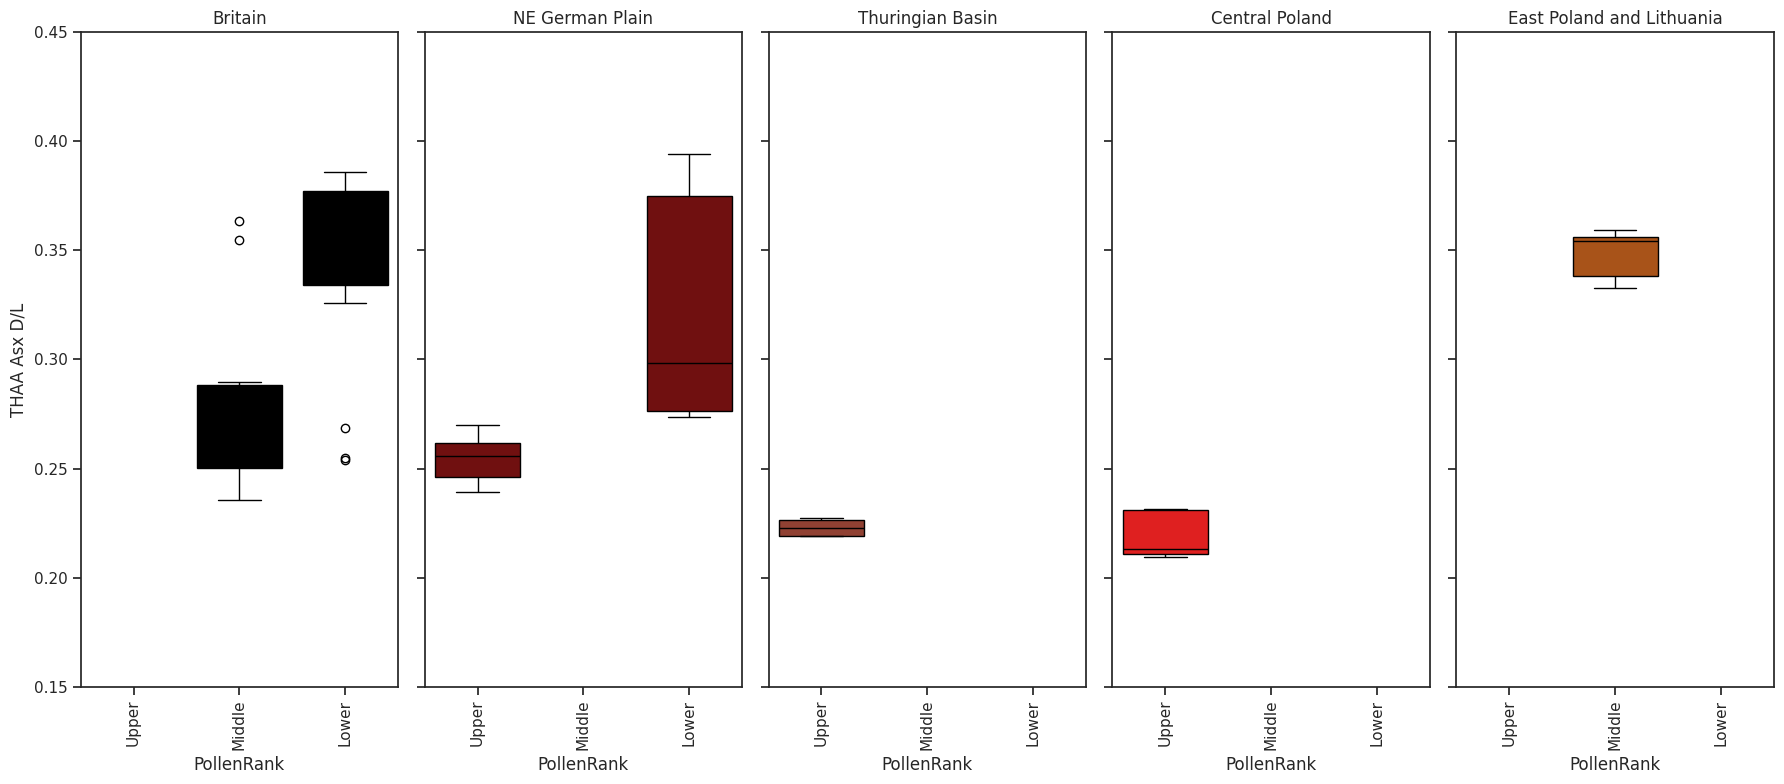

In [562]:
#Holocene pollen zones vs. Asx THAA

cols = {'East Poland' : "darkorange", 'East Poland' : '#c04e01', 'Central Poland' : 'red', 'Thuringian Basin' : '#a03623', 'North East German Plain' : 'maroon', "UK" : 'black'}

# Define the complete range of PollenRank categories
category_mapping = {
    'Lower': 2,
    'Middle': 1,
    'Upper': 0,
}
Holo_combined['PollenRank'] = Holo_combined['PollenZone'].map(category_mapping)
all_categories = list(category_mapping.values())  # [0, 1, 2]

# Function to fill missing categories for a given region
def fill_missing_categories(data, x_col, y_col, categories):
    missing_categories = set(categories) - set(data[x_col])
    if missing_categories:
        missing_df = pd.DataFrame({x_col: list(missing_categories), y_col: [None] * len(missing_categories)})
        data = pd.concat([data, missing_df], ignore_index=True)
    return data

# Subset the data by region
regions = {
    "Britain": Holo_combined.loc[Holo_combined['Region'].isin(["UK"])],
    "NE German Plain": Holo_combined.loc[Holo_combined['Region'] == "North East German Plain"],
    "Thuringian Basin": Holo_combined.loc[Holo_combined['Region'].isin(['Thuringian Basin'])],
    "Central Poland": Holo_combined.loc[Holo_combined['Region'].isin(['Central Poland'])],
    "East Poland and Lithuania": Holo_combined.loc[Holo_combined['Region'].isin(['East Poland', "Lithuania & NE Poland"])]
}

# Fill missing categories for each region
for key in regions:
    regions[key] = fill_missing_categories(regions[key], x_col="PollenRank", y_col="THAA Asx D/L", categories=all_categories)

# Set up the figure with 5 subplots
fig, ax = plt.subplots(ncols=5, figsize=(18, 8), sharey=True)

# Define consistent tick labels
tick_labels = ["Lower", "Middle", "Upper"]

# Create boxplots for each region
for idx, (title, data) in enumerate(regions.items()):
    sns.boxplot(data=data, x="PollenRank", y="THAA Asx D/L", hue="Region", palette=cols, ax=ax[idx], legend=False)
    ax[idx].set_title(title)
    ax[idx].set_xticks(all_categories)
    ax[idx].set_xticklabels(tick_labels, rotation=90)
    ax[idx].set_ylim(0.15, 0.45)
    if ax[idx].legend_:
        ax[idx].legend_.remove()

# Optimize layout
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Figs for KP/Holocene DLs vs. pollen zones.JPEG", dpi=300)
plt.show()

# Eemian pollen zone Figure 7

In [563]:
#Extraing British MIS 5e data

UK_MIS5e = df_THAA_UK.loc[df_THAA_UK['Suspected age_THAA'].isin(['MIS 4/5a', "MIS 5e"])]
UK_MIS5e = UK_MIS5e.sort_values(["Pollen Zone_THAA"], inplace=False, ascending=True)

UK_MIS5e =  pd.DataFrame(data={"SampleName" : UK_MIS5e['Sample name_THAA'],
                                   "Site" : UK_MIS5e['Site_THAA'],
                                   "Horizon" : UK_MIS5e['Name_THAA'],
                                   "Region" : 'UK',
                                   "PollenZone" : UK_MIS5e['Pollen Zone_THAA'],
                                   "LPAZ" : UK_MIS5e['Suspected age_THAA'],
                                   "THAA Asx D/L" : UK_MIS5e['Asx D/L mean_THAA'],
                                   "THAA Glx D/L" : UK_MIS5e['Glx D/L mean_THAA'],
                                   "THAA Ala D/L" : UK_MIS5e['Ala D/L mean_THAA'],
                                   "THAA Val D/L" : UK_MIS5e['Val D/L mean_THAA'],
                                   "THAA [Ser]/[Ala]" : UK_MIS5e['[S]/[A] mean_THAA']})

In [564]:
NE_Eemian = df_THAA_NE.loc[df_THAA_NE['Age if known_THAA'].isin(['Vistulian', "Eemian"])]
NE_Eemian = NE_Eemian.sort_values(["Paper_pollen_THAA"], inplace=False, ascending=True)

NE_Eemian = pd.DataFrame(data={"SampleName" : NE_Eemian['Sample name_THAA'],
                                   "Site" : NE_Eemian['Quaternary sites_THAA'],
                                   "Horizon" : NE_Eemian['Level/ Sample_THAA'],
                                   "Region" : NE_Eemian['Region_THAA'],
                                   "PollenZone" : NE_Eemian['Paper_pollen_THAA'],
                                   "LPAZ" : NE_Eemian['LPAZ_THAA'],
                                   "THAA Asx D/L" : NE_Eemian['Asx D/L_THAA'],
                                   "THAA Glx D/L" : NE_Eemian['Glx D/L_THAA'],
                                   "THAA Ala D/L" : NE_Eemian['Ala D/L_THAA'],
                                   "THAA Val D/L" : NE_Eemian['Val D/L_THAA'],
                                   "THAA [Ser]/[Ala]" : NE_Eemian['[Ser]/[Ala]_THAA']})

In [565]:
Eemian_combined =  pd.concat([NE_Eemian, UK_MIS5e], axis=0)
Eemian_combined

desired_order = {'Unknown' : 7, 'Pre temperate' :4, 'Early temperate':3, 'Late temperate':2, 'Post temperate':1, 'MIS 4/5a':0}

Eemian_combined["PollenOrder"] =  Eemian_combined["PollenZone"].map(desired_order)
Eemian_combined =  Eemian_combined.sort_values(["PollenOrder", "Region"], inplace=False, ascending=True)

In [566]:
# Removed sites where no pollen stratigraphy is associated with opercula
Eemian_combined_pollen = Eemian_combined[(Eemian_combined["PollenZone"] != "Unknown")]

In [567]:
Eemian_combined_pollen.sort_values(["PollenOrder"], inplace=False, ascending=True) #sort from earliest to latest pollen zone

,SampleName,Site,Horizon,Region,PollenZone,LPAZ,THAA Asx D/L,THAA Glx D/L,THAA Ala D/L,THAA Val D/L,THAA [Ser]/[Ala],PollenOrder
32,CBto3b,Cassington,Cassington,UK,MIS 4/5a,MIS 4/5a,0.432879,0.094213,0.123824,0.069158,0.743150,0.0
33,CBto4b,Cassington,Cassington,UK,MIS 4/5a,MIS 4/5a,0.430387,0.112680,0.124271,0.069463,0.716343,0.0
34,CBto5b,Cassington,Cassington,UK,MIS 4/5a,MIS 4/5a,0.427361,0.101251,0.131575,0.067629,0.618518,0.0
35,CBto6b,Cassington,Cassington,UK,MIS 4/5a,MIS 4/5a,0.428373,0.090594,0.107206,0.060363,0.604263,0.0
36,IsBto1b,Isleworth,Isleworth,UK,MIS 4/5a,MIS 4/5a,0.458070,0.114872,0.153544,0.069655,0.623048,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
562,NN2590Bto2,Neumark Nord 2,590,Thuringian Basin,Pre-temperate,E2,0.490017,0.149356,0.195751,0.108843,0.587257,NaN
563,NN2590Bto3,Neumark Nord 2,590,Thuringian Basin,Pre-temperate,E2,0.493611,0.147139,0.190779,0.101096,0.567569,NaN
564,NN2590Bto3,Neumark Nord 2,590,Thuringian Basin,Pre-temperate,E2,0.488509,0.145328,0.202796,0.102477,0.445979,NaN
565,NN2590Bto4,Neumark Nord 2,590,Thuringian Basin,Pre-temperate,E2,0.478728,0.139829,0.183461,0.093429,0.675107,NaN


In [568]:
#removing any non MIS 5e or Eemian data

Eemian_combined_pollen = Eemian_combined[
    (Eemian_combined["PollenZone"] != "MIS 4/5a") &
    (Eemian_combined["PollenZone"] != "Unknown")
].copy()

In [569]:
##Preparing data formatting for Eemian plot
## This includes defining color plot and that pollen zones are placed in the correct chronological order

# Define color palette (fixed duplicate keys)
cols = {
    'East Poland': "gold",
    'Central Poland': '#d0c101',
    'Thuringian Basin': '#fcb001',
    'North East German Plain': '#b79400',
    "UK": 'black'
}

# Filter data by regions
regions = {
    "Britain": Eemian_combined_pollen[Eemian_combined_pollen["Region"] == "UK"],
    "North East German Plain": Eemian_combined_pollen[Eemian_combined_pollen["Region"] == "North East German Plain"],
    "Thuringian Basin": Eemian_combined_pollen[Eemian_combined_pollen["Region"] == "Thuringian Basin"],
    "Central Poland": Eemian_combined_pollen[Eemian_combined_pollen["Region"] == "Central Poland"],
    "East Poland & Lithuania": Eemian_combined_pollen[Eemian_combined_pollen["Region"].isin(["East Poland", "Lithuania & NE Poland"])]
}

# Define the complete range of PollenRank categories and labels
category_mapping = {
   # 'MIS 4/5a': 0,
    'Post temperate': 0,
    'Late temperate': 1,
    'Early temperate': 2,
    'Pre-temperate': 3
}
tick_labels = ['Post-temperate', 'Late-temperate', 'Early-temperate', 'Pre-temperate']
all_categories = list([0, 1, 2, 3, 4])

# Ensure all x categories are present in each region's data
def ensure_categories(data, x_col, y_col, all_categories):
    """
    Ensures all categories in `all_categories` are present in `data`.
    If a category is missing, it adds it with NaN for the y-value.
    """
    existing_categories = set(data[x_col])
    missing_categories = set(all_categories) - existing_categories
    if missing_categories:
        missing_df = pd.DataFrame({x_col: list(missing_categories), y_col: [None] * len(missing_categories)})
        data = pd.concat([data, missing_df], ignore_index=True)
    return data


/tmp/ipython-input-3521329204.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, missing_df], ignore_index=True)
/tmp/ipython-input-3521329204.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, missing_df], ignore_index=True)
/tmp/ipython-input-3521329204.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determin

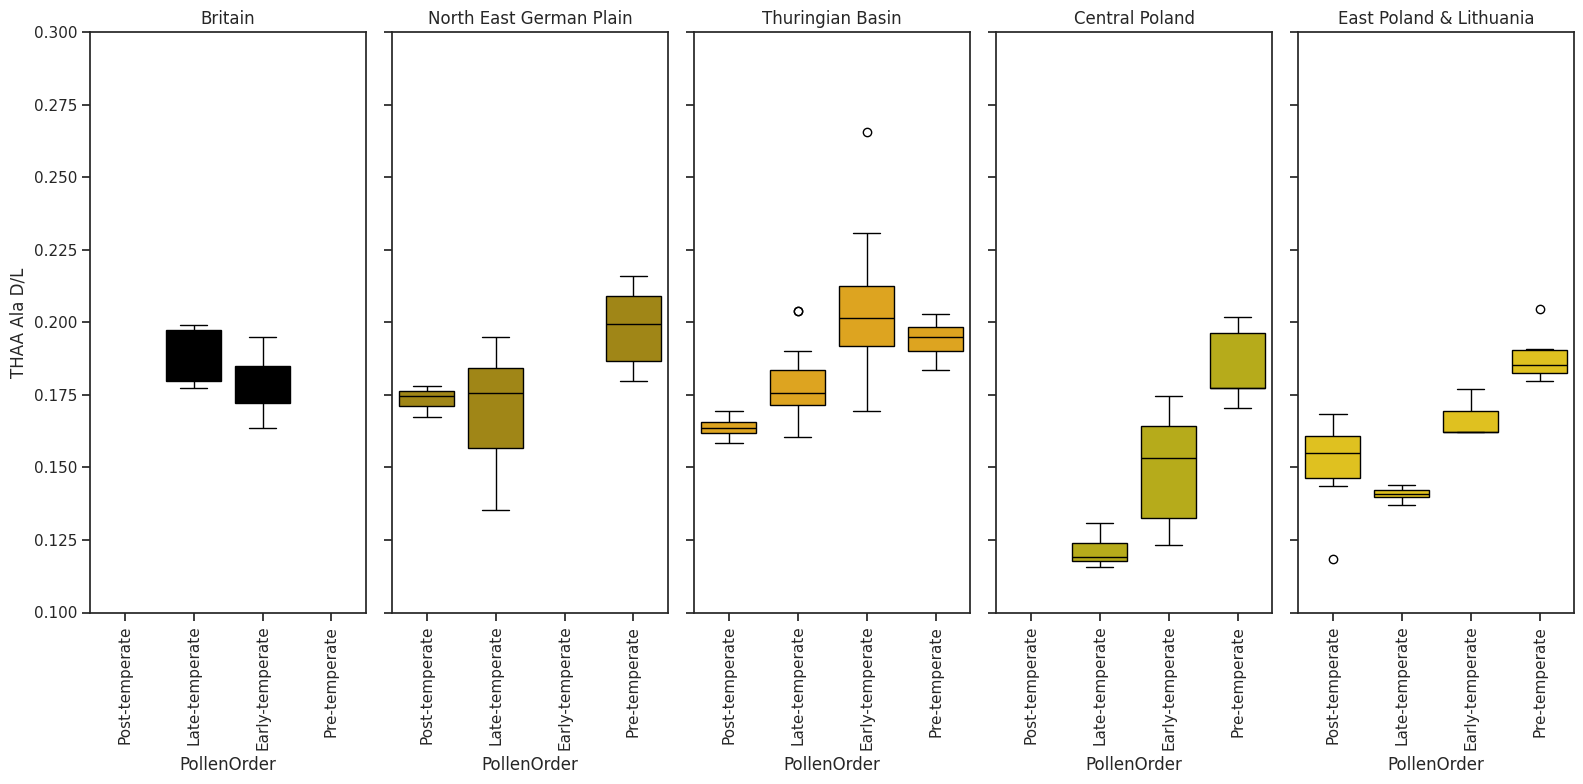

In [570]:
# Set up the figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 8), sharey=True, sharex=True)
axes = axes.flatten()#

# Create boxplots for each region
for idx, (title, data) in enumerate(regions.items()):
    temp_data = ensure_categories(
        data.assign(PollenOrder=data['PollenZone'].map(category_mapping).fillna(0).astype(int)),
        x_col="PollenOrder",
        y_col="THAA Ala D/L",
        all_categories=[0, 1, 2, 3]
    )
    sns.boxplot(
        data=temp_data,
        x="PollenOrder",
        y="THAA Ala D/L",
        hue="Region",
        palette=cols,
        ax=axes[idx],
        dodge=False,
        legend=False,
        zorder=10
    )
    axes[idx].set_title(title)
    axes[idx].set_xticks(range(len(category_mapping)))  # Use indices of the mapped categories
    axes[idx].set_xticklabels(tick_labels, rotation=90)
    axes[idx].set_ylim(0.1, 0.3)
    if axes[idx].legend_:
        axes[idx].legend_.remove()

# Remove unused subplots
if len(regions) < len(axes):
    for idx in range(len(regions), len(axes)):
        fig.delaxes(axes[idx])

# Add a shared legend
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc="upper center", ncol=len(cols), bbox_to_anchor=(0.5, 1.1))


# Optimize layout
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Figs for KP/Eemian DLs vs. pollen zones.JPEG", dpi=300)
plt.show()

# Holsteinian pollen zones: Figure 8

In [571]:
UK_Holsteinian = df_THAA_UK.loc[df_THAA_UK['Suspected age_THAA'].isin(['MIS 9', 'MIS 11', 'Cromerian Arvicola', 'MIS 13'])]
UK_Holsteinian = UK_Holsteinian.sort_values(["Pollen Zone_THAA"], inplace=False, ascending=True)


In [572]:
#Extracting data and ensuring in the correct format to concatenate
UK_Holsteinian.groupby(["Pollen Zone_THAA"])["Ala D/L mean_THAA"].describe()

UK_Holsteinian =  pd.DataFrame(data={"SampleName" : UK_Holsteinian['Sample name_THAA'],
                                   "Site" : UK_Holsteinian['Site_THAA'],
                                   "Horizon" : UK_Holsteinian['Name_THAA'],
                                   "Region" : 'UK',
                                   "Age" : UK_Holsteinian['Suspected age_THAA'],
                                   "LPAZ" : UK_Holsteinian['Suspected age_THAA'],
                                   "PollenZone" : UK_Holsteinian['Pollen Zone_THAA'],
                                   "THAA Asx D/L" : UK_Holsteinian['Asx D/L mean_THAA'],
                                   "THAA Glx D/L" : UK_Holsteinian['Glx D/L mean_THAA'],
                                   "THAA Ala D/L" : UK_Holsteinian['Ala D/L mean_THAA'],
                                   "THAA Val D/L" : UK_Holsteinian['Val D/L mean_THAA'],
                                   "THAA [Ser]/[Ala]" : UK_Holsteinian['[S]/[A] mean_THAA']})


In [573]:
#Extracting data and ensuring in the correct format to concatenate
NE_Holsteinian = df_THAA_NE.loc[df_THAA_NE['Age if known_THAA'].isin(['Holsteinian'])]
NE_Holsteinian = NE_Holsteinian.sort_values(["Paper_pollen_THAA"], inplace=False, ascending=True)

NE_Holsteinian = pd.DataFrame(data={"SampleName" : NE_Holsteinian['Sample name_THAA'],
                                   "Site" : NE_Holsteinian['Quaternary sites_THAA'],
                                   "Horizon" : NE_Holsteinian['Level/ Sample_THAA'],
                                   "Region" : NE_Holsteinian['Region_THAA'],
                                   "Age" : NE_Holsteinian['Age if known_THAA'],
                                   "LPAZ" : NE_Holsteinian['LPAZ_THAA'],
                                   "PollenZone" : NE_Holsteinian['Paper_pollen_THAA'],
                                   "THAA Asx D/L" : NE_Holsteinian['Asx D/L_THAA'],
                                   "THAA Glx D/L" : NE_Holsteinian['Glx D/L_THAA'],
                                   "THAA Ala D/L" : NE_Holsteinian['Ala D/L_THAA'],
                                   "THAA Val D/L" : NE_Holsteinian['Val D/L_THAA'],
                                   "THAA [Ser]/[Ala]" : NE_Holsteinian['[Ser]/[Ala]_THAA']})

NE_Holsteinian = NE_Holsteinian.copy()

In [574]:
#Combining Holsteinian and MIS 11 data
Holsteinian_combined =  pd.concat([NE_Holsteinian, UK_Holsteinian], axis=0)


desired_order = {'MIS 13' : 6, 'Pre temperate' :5, 'Early temperate':4, 'Late temperate':3, 'Post temperate':2, 'Post interglacial':1, 'MIS 9':0}

Holsteinian_combined["PollenOrder"] =  Holsteinian_combined["PollenZone"].map(desired_order)
Holsteinian_combined =  Holsteinian_combined.sort_values(["PollenOrder", "Region"], inplace=False, ascending=True)

/tmp/ipython-input-2004569352.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, missing_df], ignore_index=True)
/tmp/ipython-input-2004569352.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, missing_df], ignore_index=True)
/tmp/ipython-input-2004569352.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determin

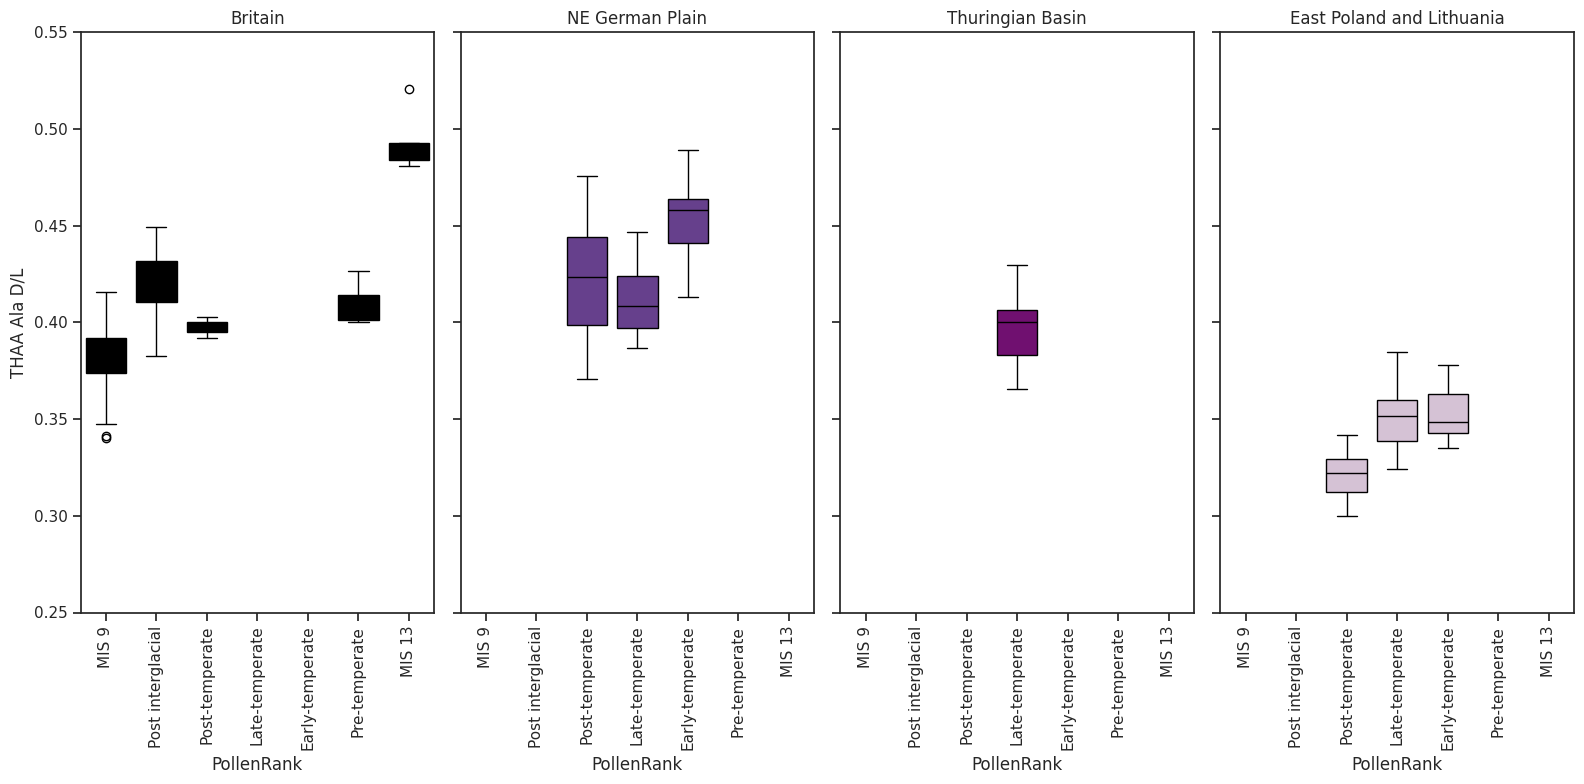

In [575]:
cols = {'East Poland and Lithuania' : 'thistle', 'East Poland' : 'thistle', 'Lithuania & NE Poland' : 'thistle', 'Central Poland' : 'mediumorchid', 'Thuringian Basin' : 'purple', 'North East German Plain' : 'rebeccapurple', "UK" : 'black'}


# Define the complete range of PollenRank categories
category_mapping = {
    'MIS 13': 6,
    'Pre temperate': 5,
    'Early temperate': 4,
    'Late temperate': 3,
    'Post temperate': 2,
    'Post interglacial' : 1,
    'MIS 9' : 0
}

Holsteinian_combined['PollenRank'] = Holsteinian_combined['PollenZone'].map(category_mapping)
all_categories = list(category_mapping.values())  # [0, 1, 2, 3, 4]

# Function to fill missing categories for a given region
def fill_missing_categories(data, x_col, y_col, categories):
    missing_categories = set(categories) - set(data[x_col])
    if missing_categories:
        missing_df = pd.DataFrame({x_col: list(missing_categories), y_col: [None] * len(missing_categories)})
        data = pd.concat([data, missing_df], ignore_index=True)
    return data

# Subset the data by region
regions = {
    "Britain": Holsteinian_combined.loc[Holsteinian_combined['Region'].isin(["UK"])],
    "NE German Plain": Holsteinian_combined.loc[Holsteinian_combined['Region'] == "North East German Plain"],
    "Thuringian Basin": Holsteinian_combined.loc[Holsteinian_combined['Region'].isin(['Thuringian Basin'])],
    "East Poland and Lithuania": Holsteinian_combined.loc[Holsteinian_combined['Region'].isin(['East Poland', "Lithuania & NE Poland"])]
}

# Fill missing categories for each region
for key in regions:
    regions[key] = fill_missing_categories(regions[key], x_col="PollenRank", y_col="THAA Ala D/L", categories=all_categories)

# Set up the figure with 5 subplots
fig, ax = plt.subplots(ncols=4, figsize=(16, 8), sharey=True)

# Define consistent tick labels
tick_labels = [
    'MIS 13',
    'Pre-temperate', 'Early-temperate', 'Late-temperate', 'Post-temperate',
    'Post interglacial', 'MIS 9'
    ]

# Create boxplots for each region
for idx, (title, data) in enumerate(regions.items()):
    sns.boxplot(data=data, x="PollenRank", y="THAA Ala D/L", hue="Region", palette=cols, ax=ax[idx], legend=False)
    ax[idx].set_title(title)
    ax[idx].set_xticks(all_categories)
    ax[idx].set_xticklabels(tick_labels, rotation=90)
    ax[idx].set_ylim(0.25, 0.55)
    if ax[idx].legend_:
        ax[idx].legend_.remove()

# Optimize layout
plt.savefig("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Figs for KP/Holsteinian DLs vs. pollen zones.JPEG", dpi=300)
plt.tight_layout()
plt.show()

# Temperature plot for Figure 3

This data is from ERA5 monthly averaged data on pressure levels from 1940 to present:
Product Type: Monthly averaged reanalysis
Variable: Temperature
Pressure Level: 1000 hPA
Year: 1940-2025
Month: All
Time: 00:00

Lat/ lons used for each region:
Britain: [50.5, 53, -2, 2]
NE German Plain: [52.3, 54.05, 11.1, 13.85]
Thuringian Basin [50.6, 51.7, 9.9, 20.75]
Central Poland: [50.6, 53.1, 16.5, 20.75]
East Poland: [50.2, 52.25, 12.65, 21.5]
NE Poland and Lithuania: [53.6, 54.85, 22.7, 25.45]

Download as NetCDF4

Citation:

Copernicus Climate Change Service (2023): ERA5 monthly averaged data on pressure levels from 1940 to present.

Hersbach, H., Bell, B., Berrisford, P., Biavati, G., Horányi, A., Muñoz Sabater, J., Nicolas, J., Peubey, C., Radu, R., Rozum, I., Schepers, D., Simmons, A., Soci, C., Dee, D., Thépaut, J-N. (2023): ERA5 monthly averaged data on pressure levels from 1940 to present. Copernicus Climate Change Service (C3S) Climate Data Store (CDS), DOI: 10.24381/cds.6860a573 (Accessed on DD-MMM-YYYY)


Data was converted into an CSV for each region with monthly means extracted for each coordinate point and used in the following code

"""

In [ ]:
#extracting values for observations
##replace file path with relevant file path

df_CPL = pd.read_csv("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/ClimateTimeSeries/ERA5_reanalysis/CPL_monthly_means.csv", sep=',', encoding='latin-1')
df_NEP = pd.read_csv("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/ClimateTimeSeries/ERA5_reanalysis/NEP_monthly_means.csv", sep=',', encoding='latin-1')
df_NEG = pd.read_csv("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/ClimateTimeSeries/ERA5_reanalysis/NEG_monthly_means.csv", sep=',', encoding='latin-1')
df_SEP = pd.read_csv("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/ClimateTimeSeries/ERA5_reanalysis/SEP_monthly_means.csv", sep=',', encoding='latin-1')
df_EAUK = pd.read_csv("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/ClimateTimeSeries/ERA5_reanalysis/EAUK_monthly_means.csv", sep=',', encoding='latin-1')
df_TB = pd.read_csv("/content/drive/MyDrive/Papers/First author papers/NE Europe paper/ClimateTimeSeries/ERA5_reanalysis/TB_monthly_means.csv", sep=',', encoding='latin-1')

In [ ]:
#Mean, max and min were extracted
## Temperature values were concerted from Kelvin to celcius

df_CPL_mean = (df_CPL.groupby('month')["t2m"].mean().reset_index()) - 273.15
df_TB_mean = (df_TB.groupby('month')["t2m"].mean().reset_index()) - 273.15
df_NEG_mean = (df_NEG.groupby('month')["t2m"].mean().reset_index()) - 273.15
df_SEP_mean = (df_SEP.groupby('month')["t2m"].mean().reset_index()) - 273.15
df_EAUK_mean = (df_EAUK.groupby('month')["t2m"].mean().reset_index()) - 273.15
df_NEP_mean = (df_NEP.groupby('month')["t2m"].mean().reset_index()) - 273.15


df_CPL_max = (df_CPL.groupby('month')["t2m"].max().reset_index()) - 273.15
df_TB_max = (df_TB.groupby('month')["t2m"].max().reset_index()) - 273.15
df_NEG_max = (df_NEG.groupby('month')["t2m"].max().reset_index()) - 273.15
df_SEP_max = (df_SEP.groupby('month')["t2m"].max().reset_index()) - 273.15
df_EAUK_max = (df_EAUK.groupby('month')["t2m"].max().reset_index()) - 273.15
df_NEP_max = (df_NEP.groupby('month')["t2m"].max().reset_index()) - 273.15

df_CPL_min = (df_CPL.groupby('month')["t2m"].min().reset_index()) - 273.15
df_TB_min = (df_TB.groupby('month')["t2m"].min().reset_index()) - 273.15
df_NEG_min = (df_NEG.groupby('month')["t2m"].min().reset_index()) - 273.15
df_SEP_min = (df_SEP.groupby('month')["t2m"].min().reset_index()) - 273.15
df_EAUK_min = (df_EAUK.groupby('month')["t2m"].min().reset_index()) - 273.15
df_NEP_min = (df_NEP.groupby('month')["t2m"].min().reset_index()) - 273.15


In [ ]:
#seasonal temperature range was calculated

EAUK_seas = max(df_EAUK_mean["t2m"]) - min(df_EAUK_mean["t2m"])
TB_seas = max(df_TB_mean["t2m"]) - min(df_TB_mean["t2m"])
NEG_seas = max(df_NEG_mean["t2m"]) - min(df_NEG_mean["t2m"])
CPL_seas = max(df_CPL_mean["t2m"]) - min(df_CPL_mean["t2m"])
SEP_seas = max(df_SEP_mean["t2m"]) - min(df_SEP_mean["t2m"])
NEP_seas = max(df_NEP_mean["t2m"]) - min(df_NEP_mean["t2m"])

In [ ]:
#line figure produced

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df_EAUK_mean['t2m'], 'o-', c="grey", label="Britain", linewidth = 2)
#ax.plot(df_EAUK_max['t2m'], 'o-.', c="grey", alpha=0.6)
#ax.plot(df_EAUK_min['t2m'], 'o-.', c="grey", alpha=0.6)

ax.plot(df_NEG_mean['t2m'], 'o-', c="red", label="NE German Plain", linewidth = 2)
#ax.plot(df_NEG_max['t2m'], 'o-.', c="red", alpha= 0.6)
#ax.plot(df_NEG_min['t2m'], 'o-.', c="red", alpha= 0.6)


ax.plot(df_TB_mean['t2m'], 'o-', c="black", label="Thuringian Basin")
#ax.plot(df_TB_min['t2m'], 'o-.', c="black", alpha= 0.6)
#ax.plot(df_TB_max['t2m'],'o-.', c="black", alpha= 0.6)


ax.plot(df_CPL_mean['t2m'], 'o-', c="blue", label="Central Poland")
#ax.plot(df_CPL_min['t2m'], 'o-.', c="blue", alpha= 0.6)
#ax.plot(df_CPL_max['t2m'],'o-.', c="blue", alpha= 0.6)

ax.plot(df_SEP_mean['t2m'],'o-', c="purple", label="East Poland", linewidth = 2)
#ax.plot(df_SEP_min['t2m'], 'o-.', c="purple", alpha= 0.6)
#ax.plot(df_SEP_max['t2m'],'o-.', c="purple", alpha= 0.6)


ax.plot(df_NEP_mean['t2m'], 'o-', c="green", label="NE Poland and Lithuania", linestyle=(0,(3,1,1,1)))
#ax.plot(df_NEP_min['t2m'], 'o-.', c="green", alpha= 0.6)
#ax.plot(df_NEP_max['t2m'],'o-.', c="green", alpha= 0.6)


ax.set_xticks(range(0,12,1))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"], fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.ylabel("2m MAT ($^\circ$C)", fontsize=16)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Figs for KP/NePlain_Temp.tiff", dpi=300)